# Comparison with EventDisplay

**Purpose of this notebook:**

- Read DL2 files from _EventDisplay_ in FITS format

- Read _pyirf_ output

- Compare the outputs

**Notes:**

Only the _on-axis 50 h_ case is taken into account for the moment.

**Resources:**

_EventDisplay_ DL2 data, https://forge.in2p3.fr/projects/cta_analysis-and-simulations/wiki/Eventdisplay_Prod3b_DL2_Lists

**TO-DOs:**

- ..

## Imports

In [1]:
import numpy as np
import uproot
from astropy.io import fits
import matplotlib.pyplot as plt

## Definitions of classes and functions

If judged useful, these should be moved to pyirf!

## Inputs

### _EventDisplay_

The input data provided by _EventDisplay_ are in _ROOT_ format, so _uproot_ is used to transform it into _numpy_ objects. 

In [2]:
# Path of the required input data in the user's local setup
# Please, empty these variables before pushing to the repo!
indir_EventDisplay = "/Users/michele/Applications/ctasoft/tests/pyirf/EventDisplay/IRFs/data/WPPhys201890925LongObs"
infile_EventDisplay = "DESY.d20180113.V3.ID0_180degNIM2LST4MST4SST4SCMST4.prod3b-paranal20degs05b-NN.S.3HB9-FD.180000s.root"

input_EventDisplay = uproot.open(f'{indir_EventDisplay}/{infile_EventDisplay}')

In [3]:
# Contents of the ROOT file
input_EventDisplay.keys()

[b'IntSens;1',
 b'IntSensCU;1',
 b'DiffSens;1',
 b'DiffSensCU;1',
 b'BGRate;1',
 b'ProtRate;1',
 b'ElecRate;1',
 b'BGRatePerSqDeg;1',
 b'ProtRateSqDeg;1',
 b'ElecRateSqDeg;1',
 b'EffectiveArea;1',
 b'EffectiveAreaEtrue;1',
 b'EffectiveAreaEtrueNoTheta2cut;1',
 b'EffectiveAreaNoTheta2cut;1',
 b'EffectiveArea80;1',
 b'AngRes;1',
 b'AngRes80;1',
 b'AngRes95;1',
 b'AngResEtrue;1',
 b'AngResEtrue80;1',
 b'AngResEtrue95;1',
 b'ERes;1',
 b'Ebias;1',
 b'Theta2Cut;1',
 b'ThetaCut;1',
 b'MigMatrix;1',
 b'MigMatrixNoTheta2cut;1',
 b'EestOverEtrue;1',
 b'EestOverEtrueNoTheta2cut;1',
 b'AngularPSF2D;1',
 b'AngularPSF2DEtrue;1',
 b'IntSens_offaxis;1',
 b'IntSensCU_offaxis;1',
 b'DiffSens_offaxis;1',
 b'DiffSensCU_offaxis;1',
 b'BGRate_offaxis;1',
 b'ProtRate_offaxis;1',
 b'ElecRate_offaxis;1',
 b'BGRatePerSqDeg_offaxis;1',
 b'ProtRateSqDeg_offaxis;1',
 b'ElecRateSqDeg_offaxis;1',
 b'EffectiveArea_offaxis;1',
 b'EffectiveAreaEtrue_offaxis;1',
 b'EffectiveAreaEtrueNoTheta2cut_offaxis;1',
 b'EffectiveA

### Output data preparation

## _pyirf_

Until _pyirf_ will support the latest version of _gammapy_ (currently it is still using the old 0.8 version used by _protopipe_) we read its output manually (i.e. without using the classes provided by _gammapy_, like e.g. `EffectiveAreaTable`

In [5]:
indir_pyirf = "/Users/michele/Applications/ctasoft/tests/pyirf/EventDisplay/from_pyirf/irf_EventDisplay_Time50h/"
infile_pyirf = "irf.fits.gz"

hdul_pyirf = fits.open(f'{indir_pyirf}/{infile_pyirf}') # will be closed at the end of the notebook

In [6]:
# Contents of the FITS file
hdul_pyirf.info()

Filename: /Users/michele/Applications/ctasoft/tests/pyirf/EventDisplay/from_pyirf/irf_EventDisplay_Time50h//irf.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (100,)   float64   
  1  EFFECTIVE AREA    1 BinTableHDU     31   1R x 5C   [42D, 42D, 2D, 2D, 84D]   
  2  POINT SPREAD FUNCTION    1 BinTableHDU     18   21R x 3C   [E, E, E]   
  3  ENERGY DISPERSION    1 BinTableHDU     37   1R x 7C   [60D, 60D, 300D, 300D, 2D, 2D, 36000D]   
  4  BACKGROUND    1 BinTableHDU     18   21R x 3C   [E, E, E]   
  5  EFFECTIVE AREA    1 BinTableHDU     31   1R x 5C   [42D, 42D, 2D, 2D, 84D]   
  6  EFFECTIVE AREA    1 BinTableHDU     31   1R x 5C   [42D, 42D, 2D, 2D, 84D]   
  7  EFFECTIVE AREA    1 BinTableHDU     31   1R x 5C   [42D, 42D, 2D, 2D, 84D]   


### Output data preparation

## Comparison

For the moment it is not necessary to replicate perfectly the EventDisplay output, because this depends also on:
- the configuration in config.yaml,
- the specific cuts optiization performed by EventDisplay (which has not yet been replicated in pyirf)
This comparison is here to make sure that we can produce the output and use it to play a bit.

### IRFs

#### Effective collection area

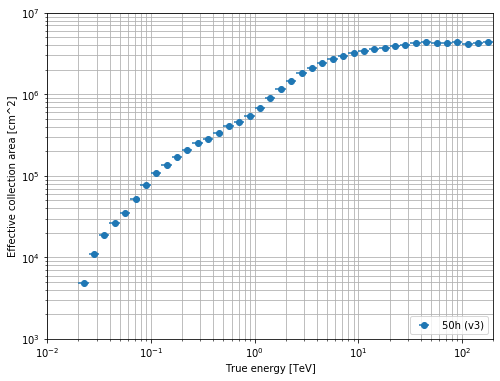

In [8]:
zoom = 2
plt.figure(figsize=(zoom*4,zoom*3))

# Data
h = input_EventDisplay["EffectiveAreaEtrue"]
x = np.asarray([(10**x_bin[1]+10**x_bin[0])/2. for x_bin in h.allbins[3:-1]])
xerr = np.asarray([(10**x_bin[1]-10**x_bin[0])/2 for x_bin in h.allbins[3:-1]])
y = h.allvalues[3:-1]
yerr = h.allvariances[3:-1]

# Style settings
plt.xlim(1.e-2, 2.e2)
plt.ylim(1.e3, 1.e7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("True energy [TeV]")
plt.ylabel("Effective collection area [cm^2]")
plt.grid(which="both")

# Plot function
plt.errorbar(x, y, xerr=xerr, yerr=None, fmt="o", label="50h (v3)")

plt.legend(loc=4)
plt.show()

#### Energy resolution

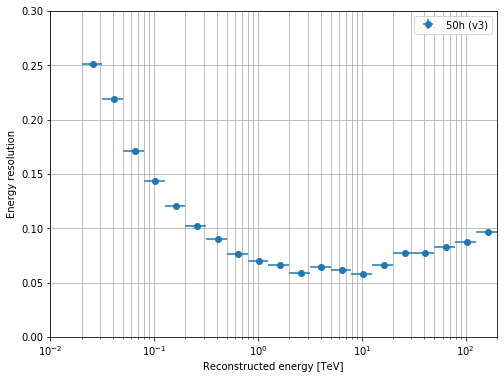

In [9]:
zoom = 2
plt.figure(figsize=(zoom*4,zoom*3))

# Data
h = input_EventDisplay["ERes"]
x = np.asarray([(10**x_bin[1]+10**x_bin[0])/2. for x_bin in h.bins[1:]])
xerr = np.asarray([(10**x_bin[1]-10**x_bin[0])/2 for x_bin in h.bins[1:]])
y = h.values[1:]
yerr = h.variances[1:]

# Style settings
plt.xlim(1.e-2, 2.e2)
plt.ylim(0., 0.3)
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Reconstructed energy [TeV]")
plt.ylabel("Energy resolution")
plt.grid(which="both")

# Plot function
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt="o", label="50h (v3)")

plt.legend(loc="best")
plt.show()

#### Angular resolution

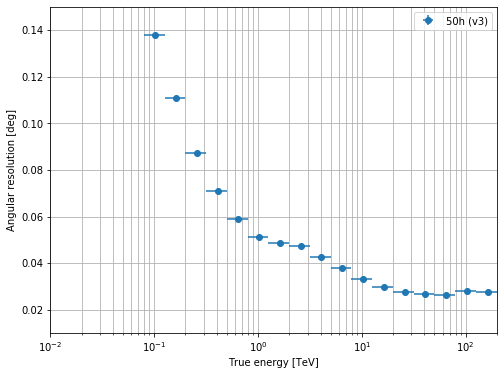

In [10]:
zoom = 2
plt.figure(figsize=(zoom*4,zoom*3))

# Data
h = input_EventDisplay["AngResEtrue"]
x = np.asarray([(10**x_bin[1]+10**x_bin[0])/2. for x_bin in h.bins])
xerr = np.asarray([(10**x_bin[1]-10**x_bin[0])/2 for x_bin in h.bins])
y = h.values
yerr = h.variances

# Style settings
plt.xlim(1.e-2, 2.e2)
plt.ylim(0.01, 0.15)
plt.xscale("log")
plt.xlabel("True energy [TeV]")
plt.ylabel("Angular resolution [deg]")
plt.grid(which="both")

# Plot function
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt="o", label="50h (v3)")

plt.legend(loc="best")
plt.show()

### Differential sensitivity

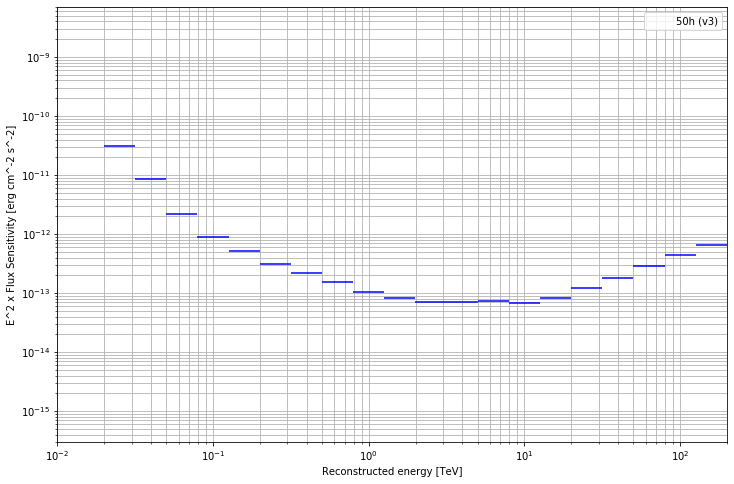

In [11]:
plt.figure(figsize=(12,8))

# Data
h = input_EventDisplay["DiffSens"]

#x = np.asarray([(x_bin[1]+x_bin[0])/2. for x_bin in h.allbins[2:-1]])
x = 10**h.edges[1:-1]

y = h.values[1:]
#yerr = h.allvariances[2:-1]

# Style settings
plt.xlim(1.e-2, 2.e2)
plt.ylim(3.e-16, 7.e-9)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Reconstructed energy [TeV]")
plt.ylabel("E^2 x Flux Sensitivity [erg cm^-2 s^-2]")
plt.grid(which="both")


# Plot function

errdict=dict(fmt="o")

plt.bar(x,
        height=y, 
        width=np.diff(10**h.edges[1:]), 
        align='edge', 
        xerr=np.diff(10**h.edges[1:])/2,
        yerr=None,
        fill=False,
        linewidth=0,
        label="50h (v3)",
        ecolor = "blue",
        )

plt.legend(loc="best")
plt.show()

## Close FITS files

In [13]:
input_EventDisplay.close()
hdul_pyirf.close()